<h2>Задача 1.  
    Оценим месячный retention в оформление заказа с помощью когортного анализа</h2>

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors
from operator import attrgetter

In [2]:
# Загружаем таблицу с покупателями
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-tatjana-ratova-efy-ef23a/My_folder/Product_analytics_final_project/olist_customers_dataset.csv')
customers.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [3]:
# Загружаем таблицу с заказами
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-tatjana-ratova-efy-ef23a/My_folder/Product_analytics_final_project/olist_orders_dataset.csv')
orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [4]:
# Загружаем таблицу с товарными позициями заказов
order_items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-tatjana-ratova-efy-ef23a/My_folder/Product_analytics_final_project/olist_order_items_dataset.csv')
order_items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [5]:
# Джойним таблицы с покупателями и заказами
orders_customers = pd.merge(orders, customers, how='left', on='customer_id')
orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


В нашем исследовании мы будем учитывать только успешные заказы, в качестве которых примем заказы со статусом "delivered".

In [6]:
# Принимаем решение, что в расчете retention будут участвовать заказы со статусом 'delivered', фильтруем таблицу по этим заказам
orders_customers_delivered = orders_customers.copy()
orders_customers_delivered = orders_customers_delivered.query('order_status == "delivered"')
orders_customers_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [7]:
# Извлекаем месяц из даты заказа
orders_customers_delivered['order_purchase_timestamp'] = pd.to_datetime(orders_customers_delivered['order_purchase_timestamp'])
orders_customers_delivered['order_period'] = orders_customers_delivered.order_purchase_timestamp.dt.to_period('M')
orders_customers_delivered['order_period_day'] = orders_customers_delivered.order_purchase_timestamp.dt.to_period('D')
orders_customers_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_period,order_period_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,2018-02-13


In [8]:
# Присваиваем когорты на основе первого заказа для каждого пользователя
orders_customers_delivered['cogort'] = orders_customers_delivered.groupby('customer_unique_id').order_purchase_timestamp.transform('min').dt.to_period('M')
orders_customers_delivered['cogort_day'] = orders_customers_delivered.groupby('customer_unique_id').order_purchase_timestamp.transform('min').dt.to_period('D')
orders_customers_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_period,order_period_day,cogort,cogort_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02,2017-09,2017-09-04
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018-07-24,2018-07,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018-08-08,2018-08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017-11-18,2017-11,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,2018-02-13,2018-02,2018-02-13


In [9]:
# Рассчитываем номер периода
orders_customers_delivered['period_number_month'] = np.floor((orders_customers_delivered.order_period_day - orders_customers_delivered.cogort_day).apply(attrgetter('n'))/30)
orders_customers_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_period,order_period_day,cogort,cogort_day,period_number_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02,2017-09,2017-09-04,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018-07-24,2018-07,2018-07-24,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018-08-08,2018-08,2018-08-08,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017-11-18,2017-11,2017-11-18,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,2018-02-13,2018-02,2018-02-13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03,2017-03-09,2017-03,2017-03-09,0.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02,2018-02-06,2018-02,2018-02-06,0.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08,2017-08-27,2017-08,2017-08-27,0.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01,2018-01-08,2018-01,2018-01-08,0.0


In [10]:
# Агригируем данные по когортам и номеру периода
df_cohort = orders_customers_delivered.groupby(['cogort', 'period_number_month']).agg(n_customers=('customer_unique_id', 'nunique')).reset_index()
df_cohort

,cogort,period_number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,262
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1
...,...,...,...
210,2018-06,1.0,22
211,2018-06,2.0,6
212,2018-07,0.0,5949
213,2018-07,1.0,6


In [11]:
# Найдем, сколько в среднем (по медиане) новых пользователей приходит в продукт ежемесячно
df_cohort.query('period_number_month == 0').n_customers.median()

4057.0

In [12]:
# Создаем сводную таблицу для когортного анализа
cohort_pivot = df_cohort.pivot_table(index='cogort', columns='period_number_month', values='n_customers')
cohort_pivot.head(20)

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cogort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Рассчитываем размер когорт
cohort_size = cohort_pivot.iloc[:, 0]

In [14]:
# Рассчитываем retention
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix.head()

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cogort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN


In [15]:
# Анализируем, чему равен медианный retention первого месяца (0.0035)
retention_matrix[1.0].median()

0.0035460992907801418

<h2>Задача 2. Определим, существует ли product/market fit у маркетплейса<h2>

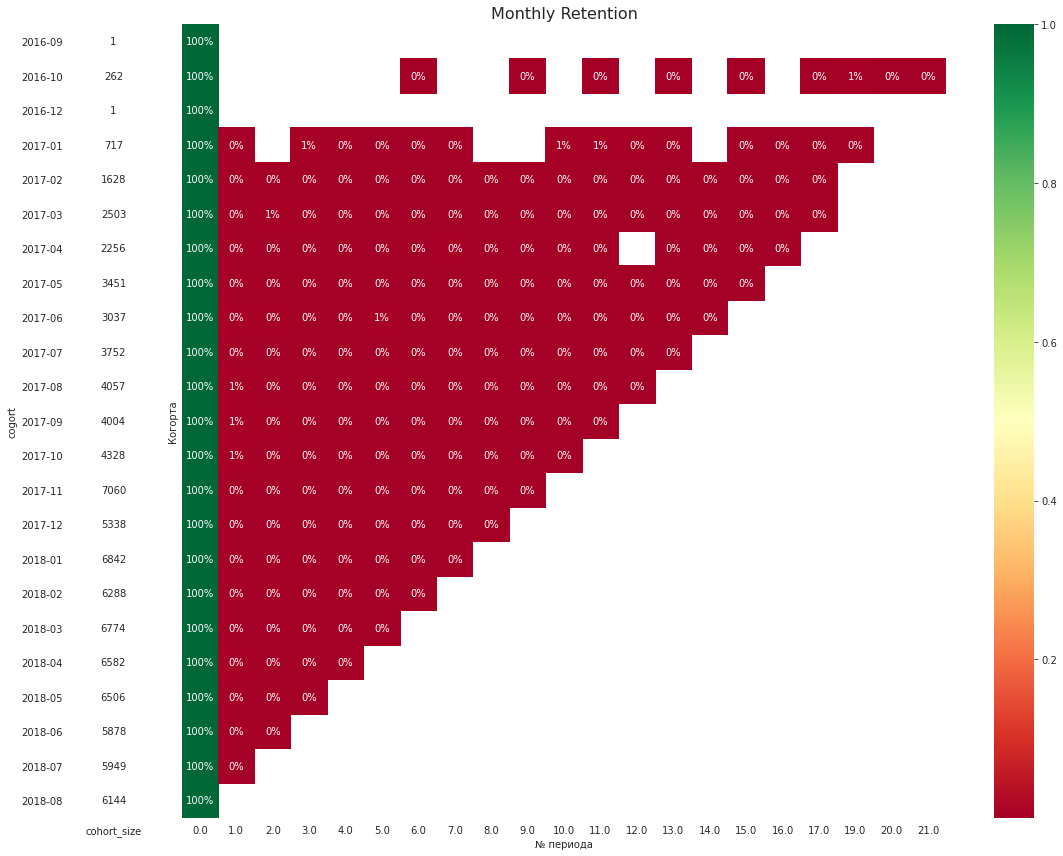

In [16]:
# Строим тепловую карту когортного анализа
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

<h3>Вывод</h3>
<br>Согласно тепловой карте когортного анализа маркетплейс имеет слабый product/market fit.  
<br>Когортный анализ показывает, что продукт может привлекать новых клиентов, готовых совершать покупки. Ежемесячно в продукт приходят 4057 новых клиентов (по медиане). Однако лишь 0.3% (по медиане) клиенток остаются в продукте в первый месяц после покупки, во второй месяц retention и вовсе снижается до 0. Это говорит о том, что клиенты не находят достаточной ценности в продукте, чтобы продолжать его использовать. Неспособность маркетплейса удерживать клиентов может быть связана  с качеством обслуживания, отсутствием необходимых функций, техническими проблемами при оформлении заказа.  
<br>Компании необходимо сконцентрироваться на проблеме удержания клиентов, понять причины, по которым клиенты уходят после первого заказа.

<h2>Задача 3. Определим 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании</h2>

1. В качестве метрики, которая должна отражать рост продаж маркетплейса, выбираем **выручку**.

In [17]:
# Джойним таблицу с заказами и таблицу с позициями заказов
orders_revenue = pd.merge(order_items, orders, on='order_id', how='left')
orders_revenue.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [18]:
# Извлекаем месяц из даты оплаты
orders_revenue['order_approved_at'] = pd.to_datetime(orders_revenue['order_approved_at'])
orders_revenue['pay_month'] = orders_revenue.order_approved_at.dt.to_period('M').astype(str)
orders_revenue.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,pay_month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,2017-04
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,2018-01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,2017-02


In [19]:
# Отбираем успешные заказы, группируем по месяцам, считаем выручку
revenue = orders_revenue.query('order_status == "delivered"').groupby('pay_month', as_index=False).price.sum()
revenue

,pay_month,price
0,2016-09,134.97
1,2016-10,40325.11
2,2016-12,10.90
3,2017-01,106888.10
4,2017-02,234163.38
5,2017-03,355372.21
6,2017-04,338207.85
7,2017-05,490696.21
8,2017-06,425825.55
9,2017-07,476556.89


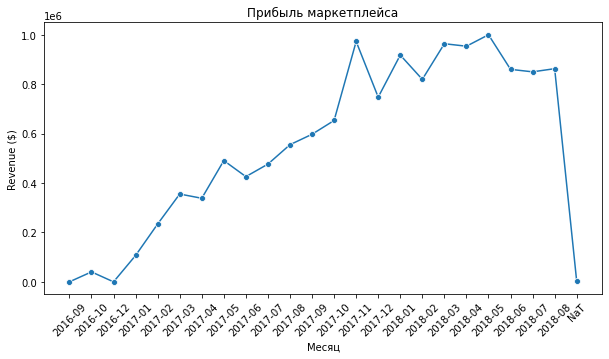

In [20]:
# Визуализируем выручку по месяцам
plt.figure(figsize=(10,5))
sns.lineplot(data=revenue, x='pay_month', y='price', marker='o')
plt.title('Прибыль маркетплейса')
plt.xlabel('Месяц')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()

2. В качестве второй метрики, отражающей объем аудитории, которой продукт доставляет ценность, выбираем **количество платящих клиентов**.

In [21]:
# Извлечем месяц из даты оплаты
orders_customers_delivered['order_approved_at'] = pd.to_datetime(orders_customers_delivered['order_approved_at'])
orders_customers_delivered['pay_month'] = orders_customers_delivered.order_approved_at.dt.to_period('M').astype(str)
orders_customers_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_period,order_period_day,cogort,cogort_day,period_number_month,pay_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02,2017-09,2017-09-04,0.0,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018-07-24,2018-07,2018-07-24,0.0,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018-08-08,2018-08,2018-08-08,0.0,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017-11-18,2017-11,2017-11-18,0.0,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,2018-02-13,2018-02,2018-02-13,0.0,2018-02


In [22]:
# Сгруппируем по месяцу оплаты, найдем пользователей, которые оплатили хотя бы 1 заказ
paying_users = orders_customers_delivered.groupby('pay_month').customer_unique_id.nunique().reset_index()
paying_users = paying_users.rename(columns={'customer_unique_id': 'paying_users'})
paying_users

,pay_month,paying_users
0,2016-09,1
1,2016-10,262
2,2016-12,1
3,2017-01,684
4,2017-02,1615
5,2017-03,2516
6,2017-04,2249
7,2017-05,3482
8,2017-06,3084
9,2017-07,3759


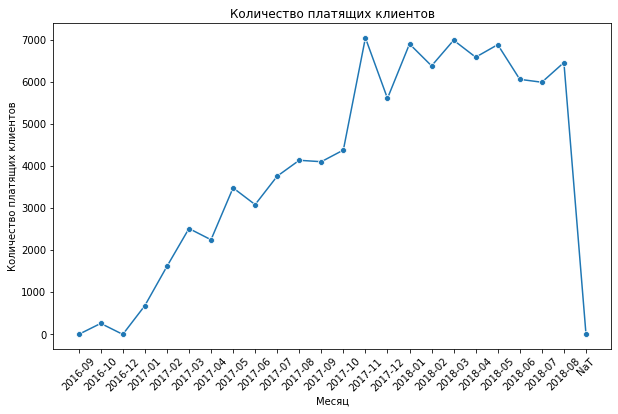

In [23]:
# Визуализируем вторую метрику
plt.figure(figsize=(10, 6))
sns.lineplot(data=paying_users, x='pay_month', y='paying_users', marker='o')
plt.title('Количество платящих клиентов')
plt.xlabel('Месяц')
plt.ylabel('Количество платящих клиентов')
plt.xticks(rotation=45)

plt.show()

3. В качестве метрики, отражающей заинтересованность новых клиентов в продукте, выбираем **конверсию в первую покупку**.  
Данная метрика покажет, какой процент клиентов совершает первую покупку после первого посещения приложения или сайта.

4. В качестве метрики, отражающей вовлеченность клиента в продолжение использования продукта, выбираем **конверсию в повторную покупку**. Данная метрика покажет, сколько клиентов захотели использовать продукт дальше после совершения первого заказа.

In [24]:
# Рассчитаем, сколько заказов совершил каждый клиент в свой первый месяц пользования продуктом
orders_0_period = orders_customers_delivered.query('period_number_month == 0.0')
orders_number_0_period = orders_0_period.groupby(['customer_unique_id', 'order_period'], as_index=False).order_id.nunique().rename(columns={'order_id': 'orders_number'})
orders_number_0_period

,customer_unique_id,order_period,orders_number
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1
...,...,...,...
93602,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1
93603,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1
93604,ffff371b4d645b6ecea244b27531430a,2017-02,1
93605,ffff5962728ec6157033ef9805bacc48,2018-05,1


In [25]:
# Рассчитаем, сколько клиентов совершили хотя бы 1 заказ в свой первый месяц пользования продуктом
customers_number_o_period = orders_number_0_period.groupby('order_period', as_index=False).customer_unique_id.nunique().rename(columns={'customer_unique_id': 'customers_number'})
customers_number_o_period

,order_period,customers_number
0,2016-09,1
1,2016-10,262
2,2016-12,1
3,2017-01,718
4,2017-02,1630
5,2017-03,2506
6,2017-04,2263
7,2017-05,3460
8,2017-06,3046
9,2017-07,3757


In [26]:
# Рассчитываем, сколько клиентов совершили второй заказ в свой первый месяц пользования продуктом
customers_number_o_period_second_order = orders_number_0_period.query('orders_number > 1').groupby('order_period', as_index=False).customer_unique_id.nunique().rename(columns={'customer_unique_id': 'second_order_customers_number'})
customers_number_o_period_second_order

,order_period,second_order_customers_number
0,2016-10,3
1,2017-01,23
2,2017-02,20
3,2017-03,37
4,2017-04,26
5,2017-05,66
6,2017-06,55
7,2017-07,66
8,2017-08,72
9,2017-09,62


In [27]:
# Соединим в одну таблицу
conversion_second_order = pd.merge(customers_number_o_period, customers_number_o_period_second_order, on='order_period', how='left')
conversion_second_order['second_order_customers_number'] = conversion_second_order['second_order_customers_number'].fillna(0)
conversion_second_order['conversion'] = round(conversion_second_order['second_order_customers_number']/conversion_second_order['customers_number'], 2)
conversion_second_order['order_period'] = conversion_second_order['order_period'].astype(str)
conversion_second_order

,order_period,customers_number,second_order_customers_number,conversion
0,2016-09,1,0.0,0.00
1,2016-10,262,3.0,0.01
2,2016-12,1,0.0,0.00
3,2017-01,718,23.0,0.03
4,2017-02,1630,20.0,0.01
5,2017-03,2506,37.0,0.01
6,2017-04,2263,26.0,0.01
7,2017-05,3460,66.0,0.02
8,2017-06,3046,55.0,0.02
9,2017-07,3757,66.0,0.02


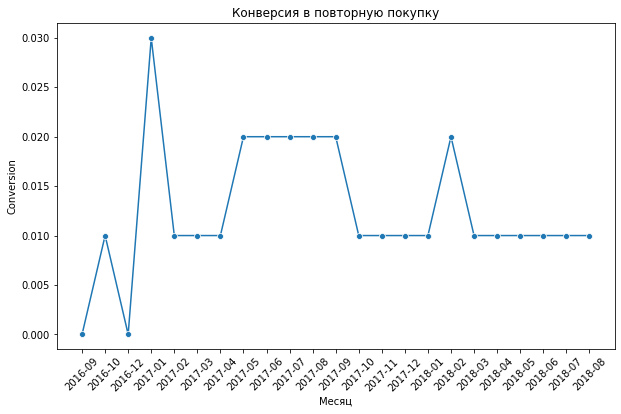

In [28]:
# Визуализируем четвертую метрику
plt.figure(figsize=(10, 6))
sns.lineplot(data=conversion_second_order, x='order_period', y='conversion', marker='o')
plt.title('Конверсия в повторную покупку')
plt.xlabel('Месяц')
plt.ylabel('Conversion')
plt.xticks(rotation=45)

plt.show()

Исследуем конверсию в повторную покупку за все время

In [29]:
#Рассчитаем количество уникальных пользователей за все время
unique_customers_number = customers.customer_unique_id.nunique()

In [30]:
# Рассчитаем, сколько клиентов сделали более 1 заказа
more_than_1_order = orders_customers.groupby('customer_unique_id', as_index=False).order_id.nunique()
more_than_1_order.query('order_id > 1')

,customer_unique_id,order_id
33,00172711b30d52eea8b313a7f2cced02,2
106,004288347e5e88a27ded2bb23747066c,2
124,004b45ec5c64187465168251cd1c9c2f,2
144,0058f300f57d7b93c477a131a59b36c3,2
249,00a39521eb40f7012db50455bf083460,2
...,...,...
95784,ff36be26206fffe1eb37afd54c70e18b,3
95810,ff44401d0d8f5b9c54a47374eb48c1b8,2
95916,ff8892f7c26aa0446da53d01b18df463,2
95934,ff922bdd6bafcdf99cb90d7f39cea5b3,3


In [31]:
# Конверсия в повторную покупку за все время составляет примерно 3%
conversion_all_time = 2997 / unique_customers_number
conversion_all_time

0.031187562437562436

**Вывод**: Очень низкая конверсия в повторную покупку (менее 3%) по месяцам и за все время.


В качестве метрики, отражающей денежное выражение вовлеченности клиентов, возьмем **ARPU**.  
Данная метрика отразит среднюю выручка с одного клиента.

In [32]:
# Рассчитаем ARPU за каждый месяц, разделив выручку на количество клиентов
arpu = pd.merge(revenue, conversion_second_order, left_on='pay_month', right_on='order_period', how='inner')
arpu = arpu.rename(columns={'price': 'revenue'})
arpu['ARPU'] = round(arpu['revenue'] / arpu['customers_number'], 2)
arpu

,pay_month,revenue,order_period,customers_number,second_order_customers_number,conversion,ARPU
0,2016-09,134.97,2016-09,1,0.0,0.00,134.97
1,2016-10,40325.11,2016-10,262,3.0,0.01,153.91
2,2016-12,10.90,2016-12,1,0.0,0.00,10.90
3,2017-01,106888.10,2017-01,718,23.0,0.03,148.87
4,2017-02,234163.38,2017-02,1630,20.0,0.01,143.66
5,2017-03,355372.21,2017-03,2506,37.0,0.01,141.81
6,2017-04,338207.85,2017-04,2263,26.0,0.01,149.45
7,2017-05,490696.21,2017-05,3460,66.0,0.02,141.82
8,2017-06,425825.55,2017-06,3046,55.0,0.02,139.80
9,2017-07,476556.89,2017-07,3757,66.0,0.02,126.85


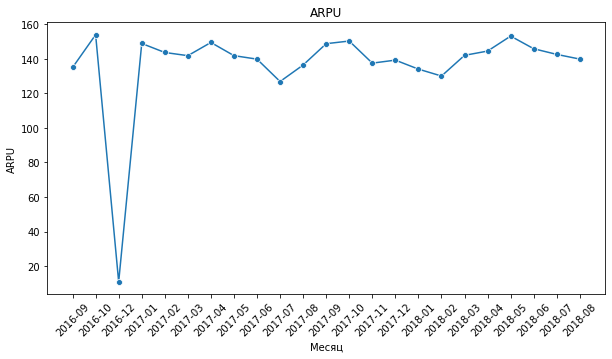

In [33]:
# Визуализируем ARPU
plt.figure(figsize=(10,5))
sns.lineplot(data=arpu, x='order_period', y='ARPU', marker='o')
plt.title('ARPU')
plt.xlabel('Месяц')
plt.ylabel('ARPU')
plt.xticks(rotation=45)

plt.show()

<h2>Задача 4. Выберем одну из 3 основных гипотез с помощью фреймворка ICE</h2>

**Гипотеза 1.**
Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.  
Confidence = 8  
Ease = 6

**Гипотеза 2.** Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.  
Confidence = 10  
Ease = 4

**Гипотеза 3.** Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.  
Confidence = 5  
Ease = 9

Шкала Impact


|Impact|1|2|3|4|5|6|7|8|9|10|
|---|---|---|---|---|---|---|---|---|---|---|
|Значение метрики|0-50|51-150|151-350|351-750|751-1550|1551-3150|3151-6350|6351-12750|12751-25550|25551-51150|

Рассчитаем ICE для гипотезы 1. Рассчитаем количество отмененных заказов, которых мы могли бы избежать при отсутствии бага. 

In [34]:
# Согласно условию, берем данные с июня 2017 года
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders_06_2017 = orders[orders['order_purchase_timestamp'] >= pd.to_datetime("2017-06-01")]
cancelled_orders_number = orders_06_2017.query('order_status == "canceled"').order_id.nunique()
cancelled_orders_number


499

Согласно шкале, impact первой гипотезы равен 4.

In [35]:
ICE_1 = 4 * 8 * 6
ICE_1

192

ICE первой гипотезы равен 192.

Рассчитаем impact для гипотезы 2. Количество заказов увеличится на число повторных заказов у клиентов, которые получили  
первый заказ с опозданием и не сделали больше заказов.

In [36]:
# Найдем заказы, сделанные с июня 2017 года
orders_customers['order_delivered_customer_date'] = pd.to_datetime(orders_customers['order_delivered_customer_date'])
orders_customers['order_estimated_delivery_date'] = pd.to_datetime(orders_customers['order_estimated_delivery_date'])
orders_customers_06_2017 = orders_customers[orders_customers['order_delivered_customer_date'] >= pd.to_datetime("2017-06-01")]
orders_customers_06_2017.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [37]:
# Определяем для каждого заказа, опоздал он или нет
orders_customers_06_2017['late'] = (orders_customers_06_2017["order_delivered_customer_date"] - orders_customers_06_2017["order_estimated_delivery_date"]).dt.days > 0
orders_customers_1 = orders_customers_06_2017[['customer_unique_id', 'order_id', 'late']].copy()
orders_customers_1 = orders_customers_1.drop_duplicates()
orders_customers_1

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_unique_id,order_id,late
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,False
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,False
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,False
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,False
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,False
...,...,...,...
99433,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,False
99437,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,False
99438,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,False
99439,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,False


In [38]:
# Клиенты, у которых один заказ и он с опозданием
orders_late = orders_customers_1.groupby('customer_unique_id', as_index=False).agg({'order_id': 'count', 'late': 'sum'})
orders_late.query('order_id == 1 and late == 1')

,customer_unique_id,order_id,late
7,0005ef4cd20d2893f0d9fbd94d3c0d97,1,1
22,0010fb34b966d44409382af9e8fd5b77,1,1
33,00196fdb2bf9edfc35e88ebfbcf8d781,1,1
50,002aba8c1af80acacef6e011f9f23262,1,1
53,002cdf87d4c03f08f7eb4551a923affc,1,1
...,...,...,...
83918,ffc9d8a98ebd09a78c8adb729c3cfa2a,1,1
83933,ffd973d43cadfa3e60340bcad8d87696,1,1
83959,ffec490ab531184a483efe2eedd68908,1,1
83961,ffeddf8aa7cdecf403e77b2e9a99e2ea,1,1


Клиентов, которые совершили 1 заказ, он опоздал, и больше они не делали заказов, оказалось 5899.
Рассчитаем, сколько заказов они принесли бы, если бы сделали повторный заказ, умножив количество данных клиентов на конверсию в повторную покупку.

In [39]:
5899 * 0.0035

20.6465

Получили около 20 заказов, согласно шкале Impact второй гипотезы равен 1.
Рассчитаем ICE.

In [40]:
ICE_2= 1 * 4 * 10 
ICE_2

40

ICE второй гипотезы равно 40.

Рассчитаем ICE для третьей гипотезы. Предполагаем, что количество заказов увеличится за счет повторных заказов.

In [41]:
# Найдем клиентов, которые сделали по 1 заказу и умножим их на конверсию в повторный заказ
orders_customers_2 = orders_customers_06_2017.groupby('customer_unique_id', as_index=False).order_id.nunique()
orders_customers_2.query('order_id == 1')

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f6ccb0745a6a4b88665a16c9f078,1
3,0004aac84e0df4da2b147fca70cf8255,1
4,0004bd2a26a76fe21f786e4fbd80607f,1
...,...,...
83976,fffb09418989a0dbff854a28163e47c6,1
83977,fffbf87b7a1a6fa8b03f081c5f51a201,1
83978,fffcf5a5ff07b0908bd4e2dbc735a684,1
83979,fffea47cd6d3cc0a88bd621562a9d061,1


In [42]:
# Получили 81627 клиентов, найдем, сколько заказов они бы принесли нам
81627 * 0.0035

285.6945

Примерно 285 заказов. Согласно шкале, Impact третьей гипотезы равен 3.
Рассчитаем ICE.

In [43]:
ICE_3 = 3 * 5 * 9
ICE_3

135

Таким образом, ICE гипотез соответственно: 192, 40, 135.  
**Выбираем первую гипотезу**: если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

<h2>Задача 5. Сформулируем метрики, на которые повлияет данная гипотеза.</h2>

**Целевые метрики**  
В качестве целевой метрики используем количество доставленных заказов, это позволит отразить, повлияло ли исправление бага на отмены заказов.  
Также можно использовать среднюю выручку с платящего клиента, т.к. при отсутствии отмен она увеличится.

**Прокси метрика**  
В качестве прокси метрики используем конверсию в повторную покупку, т.к. если клиент получит первый заказ без проблем,
он захочет сделать второй заказ.

**Guardrail метрики**  
В качестве guardrail метрики используем количество заказов, доставленных вовремя. Это поможет отследить,
не возникнет ли проблем с доставкой при увеличении количества заказов.
Также можно использовать конверсию в оформление заказа. Это покажет нам, не стало ли исправление бага негативно сказываться на желании клиента совершить заказ.